In [1]:
import numpy as np
from scipy.stats import binom
from scipy.special import comb, gamma, kv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gaussian_covariance(x, ell):
    x_normalized = x / ell
    return np.exp(-x_normalized**2/2)

def matern_covariance(x, ell, nu=0.5):
    # Matern covariance with lengthscale ell    
    x[x == 0.0] += np.finfo(float).eps  # strict zeros result in nan
    x_normalized = np.sqrt(2*nu) * x / ell
    return (2**(1-nu) / gamma(nu)) * (x_normalized)**nu * kv(nu, x_normalized)
#     if nu == 0.5:
#         x_normalized = x / ell
#         return np.exp(-x_normalized)
#     elif nu == 1.0:
#         x_normalized = np.sqrt(3) * x / ell
#         return (1 + x_normalized) * np.exp(-x_normalized)
#     elif nu == 1.5:
#         x_normalized = np.sqrt(5) * x / ell
#         return (1 + x_normalized + x_normalized**2 / 3) * np.exp(-x_normalized)

In [3]:
def gaussian_normalization(ell):
    # Integral of Gaussian covariance with lengthscale ell from 0 to infinity
    return 0.5 * np.sqrt(2 * np.pi * ell**2)

def matern_normalization(ell, nu):
    # Integral of Matern covariance with lengthscale ell from 0 to infinity
    return 0.5 * np.sqrt(2 * np.pi * ell**2) * gamma(nu + 0.5)/gamma(nu)/(nu**0.5)

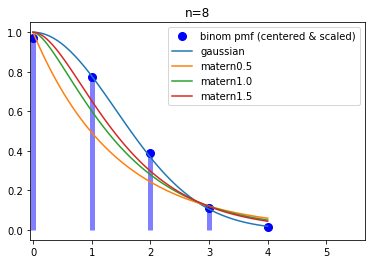

In [4]:
n = 8
p = 0.5
ell = np.sqrt(n * p * (1-p))

def binom_pmf(k, n, p):
    ell = np.sqrt(n * p * (1-p))
    return comb(n, k) * p**k * (1 - p)**(n - k) * (2 * np.pi * ell**2)**(1/2) # rescale to gaussian


fig, ax = plt.subplots()

k = np.arange(n//2, n + 1)

x = k - n/2
xx = np.linspace(n/2, n, 100) - n/2

ax.plot(x, binom_pmf(k, n, p), 'bo', ms=8, label='binom pmf (centered & scaled)')
ax.vlines(x, 0, binom_pmf(k, n, p), colors='b', lw=5, alpha=0.5)

ax.plot(xx, gaussian_covariance(xx, ell), label='gaussian')

ax.plot(xx, matern_covariance(xx, ell, nu=0.5), label='matern0.5')
ax.plot(xx, matern_covariance(xx, ell, nu=1.0), label='matern1.0')
ax.plot(xx, matern_covariance(xx, ell, nu=1.5), label='matern1.5')

#ax.set(xlim=(- 2*np.sqrt(n*p*(1-p)), 2*np.sqrt(n*p*(1-p))))
ax.set(xlim=(-0.05, 4*ell))
ax.set(title=f"n={n}")
#ax.set(ylim=(-0.05, 10))

ax.legend()

In [5]:
[comb(6, k) for k in range(6 + 1)]

[1.0, 6.0, 15.0, 20.0, 15.0, 6.0, 1.0]

In [6]:
l2_norm_of_err = np.sum((((binom_pmf(x, n, p) - gaussian_covariance(x - n/2, np.sqrt(n*p*(1-p))))) ** 2))

In [7]:
cz_err = np.sqrt(l2_norm_of_err)

In [8]:
cz_err

0.03736026534487015

In [58]:
np.trapz(matern_covariance(x, ell, nu=1.5), x) / np.trapz(matern_covariance(xx, ell, nu=1.5), xx)

1.0006861045260276

In [59]:
np.trapz(gaussian_covariance(x, ell), x) / np.trapz(gaussian_covariance(xx, ell), xx) 

0.9983445186828734

In [60]:
np.trapz(matern_covariance(x, ell, nu=1.5), x) / matern_normalization(ell, nu=1.5)

0.9749516033880458

In [61]:
np.trapz(gaussian_covariance(x, ell), x) / gaussian_normalization(ell)

0.9936717209022354

array([0.01831564, 0.10539922, 0.36787944, 0.77880078, 1.        ])

In [22]:
n = 4
p = 0.5
k = np.arange(n//2, n + 1)

x = k - n/2
xx = np.linspace(n/2, n, 100) - n/2

In [25]:
6*gaussian_covariance(x - n/2, np.sqrt(n*p*(1-p)))

array([0.8120117 , 3.63918396, 6.        ])